In [24]:
import Ouzo_Sampling_Wtf_Lattice_Volume as create
from opentrons import simulate, execute, protocol_api
import OT2_Ouzo_Commands_API2c as ot2_commands
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# be able to use this as a test case in creating simplier samples, along with other test cases like echem

In [78]:
csv_plan_path = r"C:\Users\Edwin\Desktop\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Testing Plans\Sonication_Station_Formulation_12_31.csv"
csv_plan = create.get_experiment_plan(csv_plan_path)
custom_labware_dir_path = r"C:\Users\Edwin\Desktop\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Custom Labware"
custom_labware_dict = ot2_commands.custom_labware_dict(custom_labware_dir_path)
custom_labware_dict

{'20mlscintillation_12_wellplate_18000ul': {'ordering': [['A1', 'B1', 'C1'],
   ['A2', 'B2', 'C2'],
   ['A3', 'B3', 'C3'],
   ['A4', 'B4', 'C4']],
  'brand': {'brand': '20mLscintillation', 'brandId': []},
  'metadata': {'displayName': '20mLscintillation 12 Well Plate 18000 ÂµL',
   'displayCategory': 'wellPlate',
   'displayVolumeUnits': 'ÂµL',
   'tags': []},
  'dimensions': {'xDimension': 127.7, 'yDimension': 85.8, 'zDimension': 60.5},
  'wells': {'A1': {'depth': 53,
    'totalLiquidVolume': 18000,
    'shape': 'circular',
    'diameter': 27.85,
    'x': 21.81,
    'y': 70.69,
    'z': 7.5},
   'B1': {'depth': 53,
    'totalLiquidVolume': 18000,
    'shape': 'circular',
    'diameter': 27.85,
    'x': 21.81,
    'y': 42.86,
    'z': 7.5},
   'C1': {'depth': 53,
    'totalLiquidVolume': 18000,
    'shape': 'circular',
    'diameter': 27.85,
    'x': 21.81,
    'y': 15.03,
    'z': 7.5},
   'A2': {'depth': 53,
    'totalLiquidVolume': 18000,
    'shape': 'circular',
    'diameter': 27.

24


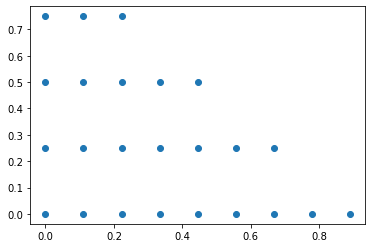

In [79]:
volf_canidates = create.generate_candidate_lattice_concentrations(csv_plan)
volf_canidates_rearranged = np.asarray(create.rearrange_2D_list(volf_canidates))
plt.scatter(volf_canidates_rearranged[0], volf_canidates_rearranged[1])
print(len(volf_canidates))

In [80]:
total_volume = csv_plan['Sample Amount']
stock_names = csv_plan['Stock Names']

# easy volume calculation as just total time volf (what paper used and no need to deviate and complicate for now)
stock_volumes = volf_canidates_rearranged*total_volume

volume_dict = {}
for i in range(len(stock_volumes)): 
    stock_name = stock_names[i]
    volume_dict[stock_name] = stock_volumes[i].ravel()
volume_df = pd.DataFrame.from_dict(volume_dict)
unfilt_volume_df = volume_df

# great use a similar logic when catching and be able to report bak for now its fine. 
volume_df = volume_df[(volume_df['precursor1-stock']> 0.020) | (volume_df['precursor1-stock'] == 0)] # the min of the pipettes, max no since no order necc
volume_df = volume_df[(volume_df['precursor2-stock']> 0.020) | (volume_df['precursor2-stock'] == 0)]
volume_df = volume_df[(volume_df['ethylene-glycol-stock']> 0.020) | (volume_df['ethylene-glycol-stock'] == 0)]

In [84]:
df_uL = volume_df*1000
df_uL

,precursor1-stock,precursor2-stock,ethylene-glycol-stock
0,0.000000,0.0,10000.000000
1,1111.111111,0.0,8888.888889
2,2222.222222,0.0,7777.777778
3,3333.333333,0.0,6666.666667
4,4444.444444,0.0,5555.555556
5,5555.555556,0.0,4444.444444
6,6666.666667,0.0,3333.333333
7,7777.777778,0.0,2222.222222
8,8888.888889,0.0,1111.111111
9,0.000000,2500.0,7500.000000


In [85]:
stock_volume_filtered_uL = df_uL.values
stock_volume_filtered_uL

array([[    0.        ,     0.        , 10000.        ],
       [ 1111.11111111,     0.        ,  8888.88888889],
       [ 2222.22222222,     0.        ,  7777.77777778],
       [ 3333.33333333,     0.        ,  6666.66666667],
       [ 4444.44444444,     0.        ,  5555.55555556],
       [ 5555.55555556,     0.        ,  4444.44444444],
       [ 6666.66666667,     0.        ,  3333.33333333],
       [ 7777.77777778,     0.        ,  2222.22222222],
       [ 8888.88888889,     0.        ,  1111.11111111],
       [    0.        ,  2500.        ,  7500.        ],
       [ 1111.11111111,  2500.        ,  6388.88888889],
       [ 2222.22222222,  2500.        ,  5277.77777778],
       [ 3333.33333333,  2500.        ,  4166.66666667],
       [ 4444.44444444,  2500.        ,  3055.55555556],
       [ 5555.55555556,  2500.        ,  1944.44444444],
       [ 6666.66666667,  2500.        ,   833.33333333],
       [    0.        ,  5000.        ,  5000.        ],
       [ 1111.11111111,  5000. 

In [83]:
protocol = simulate.get_protocol_api('2.0')
command_info = ot2_commands.create_samples(protocol, csv_plan, stock_volume_filtered_uL, custom_labware_dict)
# now test on the ot2 and you

C:\Users\Edwin\.opentrons\deck_calibration.json not found. Loading defaults
C:\Users\Edwin\.opentrons\robot_settings.json not found. Loading defaults


Picking up tip from A1 of Opentrons 96 Tip Rack 300 µL on 10
Transferring 0.0 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A1 of Corning 96 Well Plate 360 µL Flat on 2
Returning tip
Dropping tip into A1 of Opentrons 96 Tip Rack 300 µL on 10
Picking up tip from A1 of Opentrons 96 Tip Rack 1000 µL on 11
Transferring 1111.111111111111 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A2 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 555.5555555555555 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 1.0 speed
Dispensing 555.5555555555555 uL into A2 of Corning 96 Well Plate 360 µL Flat on 2 at 1.0 speed
Aspirating 555.5555555555555 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 1.0 speed
Dispensing 555.5555555555555 uL into A2 of Corning 96 Well Plate 360 µL Flat on 2 at 1.0 speed
Transferring 2222.222222222222 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A3 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 1000.0 uL from A1 of Corning 96 Well Pla